# Xây dựng mô hình SVM trên tập dữ liệu bệnh tiểu đường

Bộ dữ liệu dự đoán bệnh tiểu đường là một tập hợp các dữ liệu y tế và nhân khẩu học từ các bệnh nhân, cùng với tình trạng tiểu đường của họ (dương tính hoặc âm tính). Dữ liệu bao gồm các đặc điểm như *tuổi, giới tính, chỉ số khối cơ thể (BMI), tăng huyết áp, bệnh tim, tiền sử hút thuốc, mức HbA1c và mức đường huyết*.

Bộ dữ liệu này có thể được sử dụng để xây dựng các mô hình học máy nhằm dự đoán bệnh tiểu đường ở bệnh nhân dựa trên tiền sử bệnh án và thông tin nhân khẩu học của họ. Điều này có thể hữu ích cho các chuyên gia chăm sóc sức khỏe trong việc xác định những bệnh nhân có thể có nguy cơ mắc bệnh tiểu đường và trong việc phát triển các kế hoạch điều trị cá nhân hóa.

Ngoài ra, bộ dữ liệu có thể được các nhà nghiên cứu sử dụng để khám phá mối quan hệ giữa các yếu tố y tế, nhân khẩu học khác nhau và khả năng phát triển bệnh tiểu đường.

## Tổng quan dữ liệu

- **Số lượng bản ghi:** 100,000 dòng
- **Số lượng thuộc tính:** 9 cột
- **Loại bài toán:** Phân loại nhị phân (Binary Classification)
- **Mục tiêu:** Dự đoán bệnh tiểu đường (0: Không, 1: Có)

**Input**

| Tên cột | Kiểu dữ liệu | Mô tả | Giá trị |
|---------|-------------|--------|---------|
| `gender` | Object | Giới tính | 'Male', 'Female' |
| `age` | Float64 | Tuổi | 0.08 - 80.0 (tuổi) |
| `hypertension` | Integer | Tăng huyết áp | 0 (không), 1 (có) |
| `heart_disease` | Integer | Bệnh tim | 0 (không), 1 (có) |
| `smoking_history` | Object | Tiền sử hút thuốc | 'never', 'former', 'No Info', 'current', 'not current', 'ever' |
| `bmi` | Float64 | Chỉ số khối cơ thể | 10.3 - 69.37 |
| `HbA1c_level` | Float64 | Mức HbA1c | 3.5 - 9.0 |
| `blood_glucose_level` | Integer | Mức đường huyết | 80 - 300 |
| `diabetes` | Integer | Bệnh tiểu đường | 0 (không), 1 (có) |

## Đặc điểm dữ liệu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# from sklearn.datasets import make_blobs
# from ipywidgets import interact, fixed
# from mpl_toolkits import mplot3d
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import f1_score
# from sklearn.datasets import make_circles

In [3]:
data = pd.read_csv('data/diabetes_prediction_dataset.csv')

In [4]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Nhận xét:** Bộ dữ liệu không có dữ liệu nào thiếu ( count = 100 )

**1. Biến mục tiêu (diabetes)**

- Tỷ lệ mắc bệnh: 8.5% (mean = 0.085)

- Đây là bài toán phân loại không cân bằng (imbalanced classification)

**2. Tuổi (age)**

- Phân bố rộng: 0.08 - 80 tuổi

- Trung vị: 43 tuổi

- Có trẻ sơ sinh (0.08 tuổi) - cần xem xét liệu có phải dữ liệu lỗi.

**3. BMI**
- Trung bình: 27.32 (thừa cân nhẹ)

- Max: 95.69 - giá trị cực kỳ cao, có thể là outlier

- Phân bố tương đối ổn định (std = 6.64)

**4. Chỉ số sức khỏe**

- HbA1c_level: Trung bình 5.53% (bình thường là <5.7%)

- Blood_glucose_level: Trung bình 138 mg/dL (hơi cao)

- 75% mẫu có glucose ≤159 mg/dL

**5. Bệnh lý nền**

- Hypertension: 7.5% có tăng huyết áp
- Heart_disease: 3.9% có bệnh tim

**Tóm lại:**
- Outliers mạnh ở BMI (max = 95.69)

- Tuổi quá nhỏ (0.08)

- Data imbalance - chỉ 8.5% positive cases

## Tiền xử lý dữ liệu

Kiểm tra dữ liệu trùng lặp

In [7]:
print(data.duplicated().sum())

3854


Có 3854 bản ghi trùng nhau, tiến hành xóa các dữ liệu trùng lặp

In [8]:
print(len(data))

100000


In [9]:
data = data.drop_duplicates()
print(len(data))

96146


Sau khi xóa còn lại 96.146 dòng dữ liệu.

## Trực quan hóa dữ liệu

### Phân tích đơn biến

**Biểu đồ sự phân phối các biến định lượng**

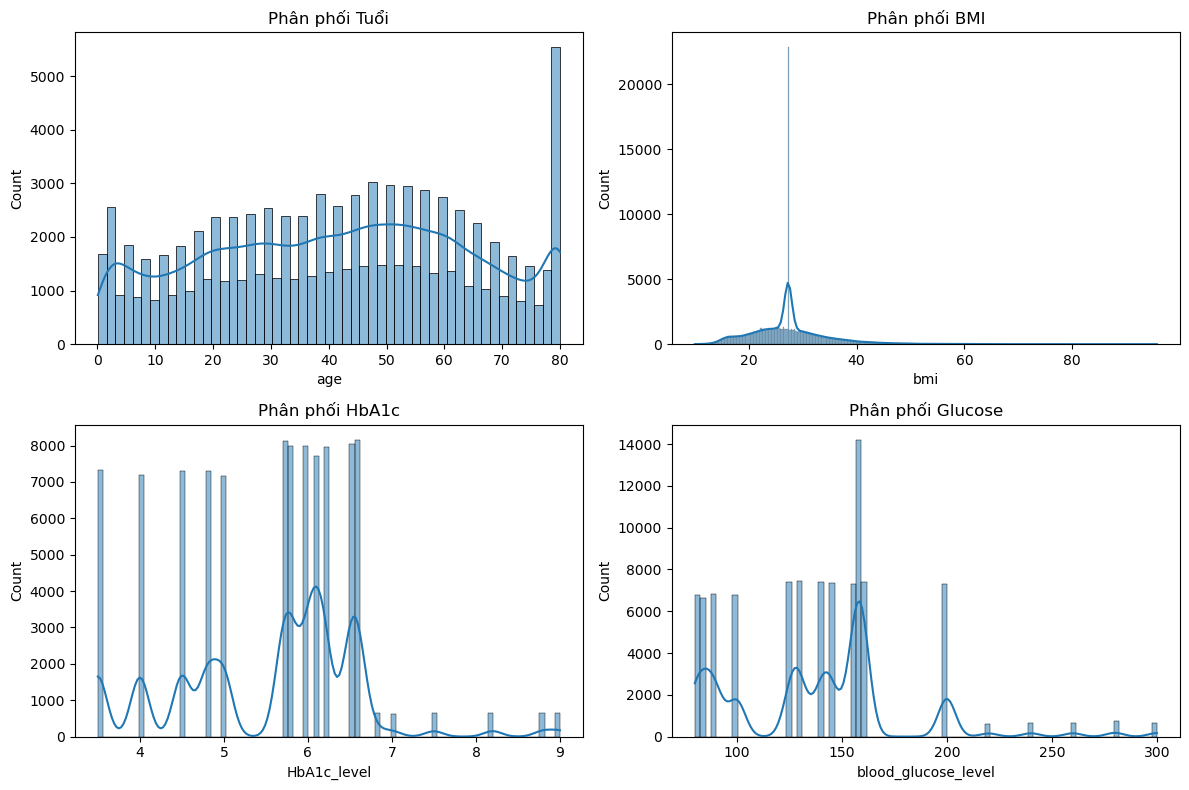

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Tuổi
sns.histplot(data['age'], ax=axes[0,0], kde=True)
axes[0,0].set_title('Phân phối Tuổi')

# BMI
sns.histplot(data['bmi'], ax=axes[0,1], kde=True)
axes[0,1].set_title('Phân phối BMI')

# HbA1c
sns.histplot(data['HbA1c_level'], ax=axes[1,0], kde=True)
axes[1,0].set_title('Phân phối HbA1c')

# Glucose
sns.histplot(data['blood_glucose_level'], ax=axes[1,1], kde=True)
axes[1,1].set_title('Phân phối Glucose')

plt.tight_layout()
plt.show()

- `Age`: phân bố tương đối đều từ 20–70, tập trung nhiều nhất ở nhóm 40–60; có cụm bất thường ở cuối (tuổi 80) *→ khả năng giá trị gán mặc định hoặc outlier.*

- `BMI`: phân phối lệch phải, đỉnh rất cao quanh ~25 cho thấy nhiều giá trị lặp/làm tròn; xuất hiện giá trị >60 *→ outliers rõ rệt.*

- `HbA1c`: tập trung khoảng 5–6.5 (tiền tiểu đường & tiểu đường), nhiều giá trị rời rạc theo nấc *→ dữ liệu có thể bị làm tròn hoặc thu thập theo thang giá trị cố định.*

- `Glucose`: phân bố lệch phải, đỉnh cao quanh 140–160; có một số điểm cực lớn >250 *→ bệnh nhân đường huyết cao/ outliers cần kiểm tra.*

**Biểu đồ boxplot các biến định lượng**

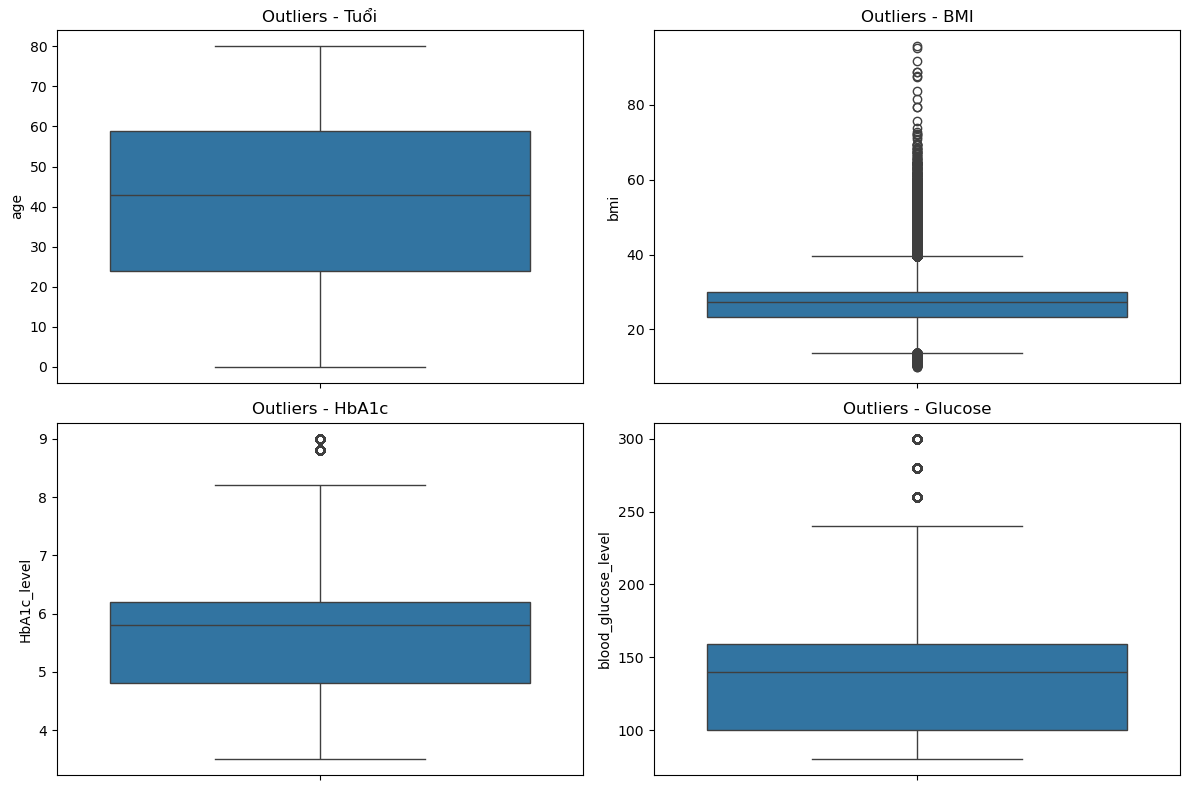

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(y=data['age'], ax=axes[0,0])
axes[0,0].set_title('Outliers - Tuổi')

sns.boxplot(y=data['bmi'], ax=axes[0,1])
axes[0,1].set_title('Outliers - BMI')

sns.boxplot(y=data['HbA1c_level'], ax=axes[1,0])
axes[1,0].set_title('Outliers - HbA1c')

sns.boxplot(y=data['blood_glucose_level'], ax=axes[1,1])
axes[1,1].set_title('Outliers - Glucose')

plt.tight_layout()
plt.show()

- Tuổi: phân bố ổn định, không có outlier đáng kể.

- BMI: có nhiều outliers ở phía trên (BMI > 40), biểu hiện giá trị bất thường hoặc lỗi nhập.

- HbA1c: vài outliers > 8, phản ánh nhóm có chỉ số đường huyết cao.

- Glucose: xuất hiện outliers > 250 mg/dL, có thể là bệnh nhân tiểu đường nặng.

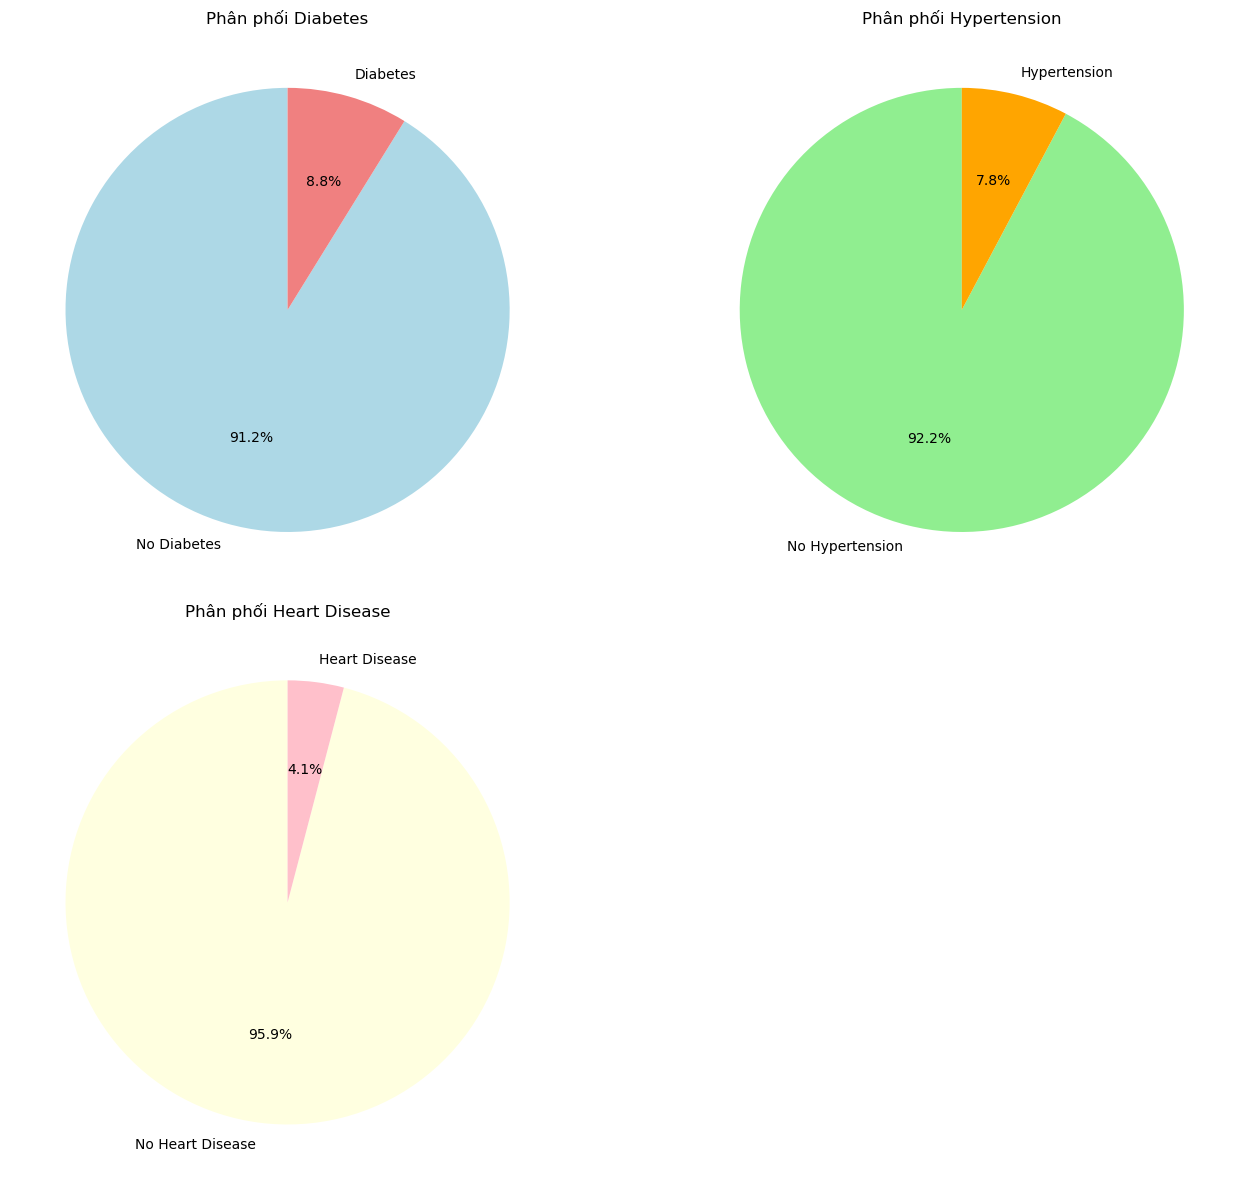

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Biến mục tiêu - Diabetes
diabetes_counts = data['diabetes'].value_counts()
axes[0,0].pie(diabetes_counts.values, labels=['No Diabetes', 'Diabetes'], 
              autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
axes[0,0].set_title('Phân phối Diabetes')

# 2. Hypertension
hypertension_counts = data['hypertension'].value_counts()
axes[0,1].pie(hypertension_counts.values, labels=['No Hypertension', 'Hypertension'], 
              autopct='%1.1f%%', colors=['lightgreen', 'orange'], startangle=90)
axes[0,1].set_title('Phân phối Hypertension')

# 3. Heart Disease
heart_counts = data['heart_disease'].value_counts()
axes[1,0].pie(heart_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
              autopct='%1.1f%%', colors=['lightyellow', 'pink'], startangle=90)
axes[1,0].set_title('Phân phối Heart Disease')

# 4. Ẩn ô trống
axes[1,1].set_visible(False)

plt.tight_layout()
plt.show()

- Diabetes (Tiểu đường): chỉ khoảng 8.8% người mắc, còn lại 91.2% không mắc *→ dữ liệu mất cân bằng (imbalanced)*

- Hypertension (Cao huyết áp): 7.8% mắc và 92.2% không mắc → tỷ lệ tương tự tiểu đường, cho thấy phần đông dân số khảo sát có sức khoẻ huyết áp bình thường.

- Heart Disease (Tim mạch): chỉ 4.1% mắc → bệnh này hiếm nhất trong dataset → càng mất cân bằng nghiêm trọng hơn.

Gender values: ['Female' 'Male' 'Other']
Smoking history values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


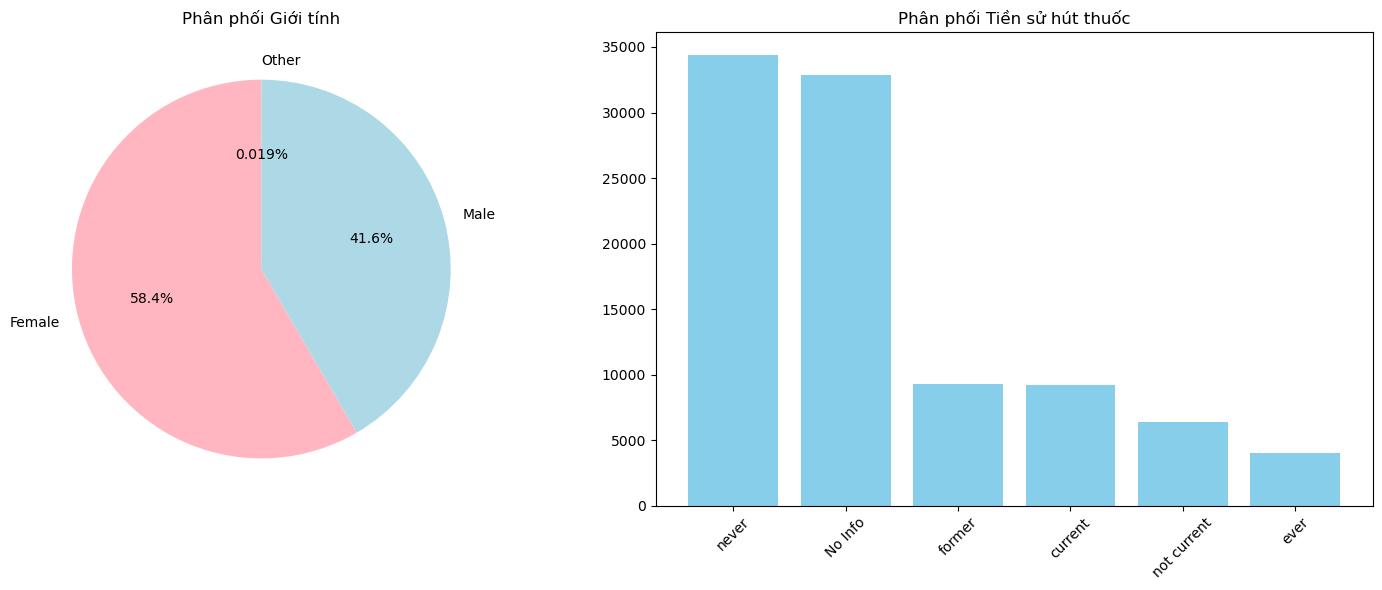

In [13]:
print("Gender values:", data['gender'].unique())
print("Smoking history values:", data['smoking_history'].unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Gender
gender_counts = data['gender'].value_counts()

# Custom autopct để hiển thị % nhỏ
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.3f}%' if pct < 1 else f'{pct:.1f}%'
    return my_autopct

axes[0].pie(gender_counts.values, labels=gender_counts.index, 
            autopct=make_autopct(gender_counts.values), startangle=90,
            colors=['lightpink', 'lightblue', 'lightgreen'])
axes[0].set_title('Phân phối Giới tính')

# 2. Smoking History
smoking_counts = data['smoking_history'].value_counts()
axes[1].bar(smoking_counts.index, smoking_counts.values, color='skyblue')
axes[1].set_title('Phân phối Tiền sử hút thuốc')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- `Gender`: Dữ liệu hơi lệch về nữ, nhưng vẫn đủ cân đối để mô hình học tốt.

- `smoking_history`:
Nhóm “never” và “No info” chiếm tỷ lệ cao nhất (~2/3 tổng mẫu), các nhóm còn lại (former, current, not current, ever) ít hơn rõ rệt.
→ Phần lớn người tham gia không có thói quen hút thuốc hoặc không cung cấp thông tin, dữ liệu thiếu cân đối giữa các nhóm.

### Phân tích nhị biến

**Biểu đồ Boxplot so sánh theo biến mục tiêu**

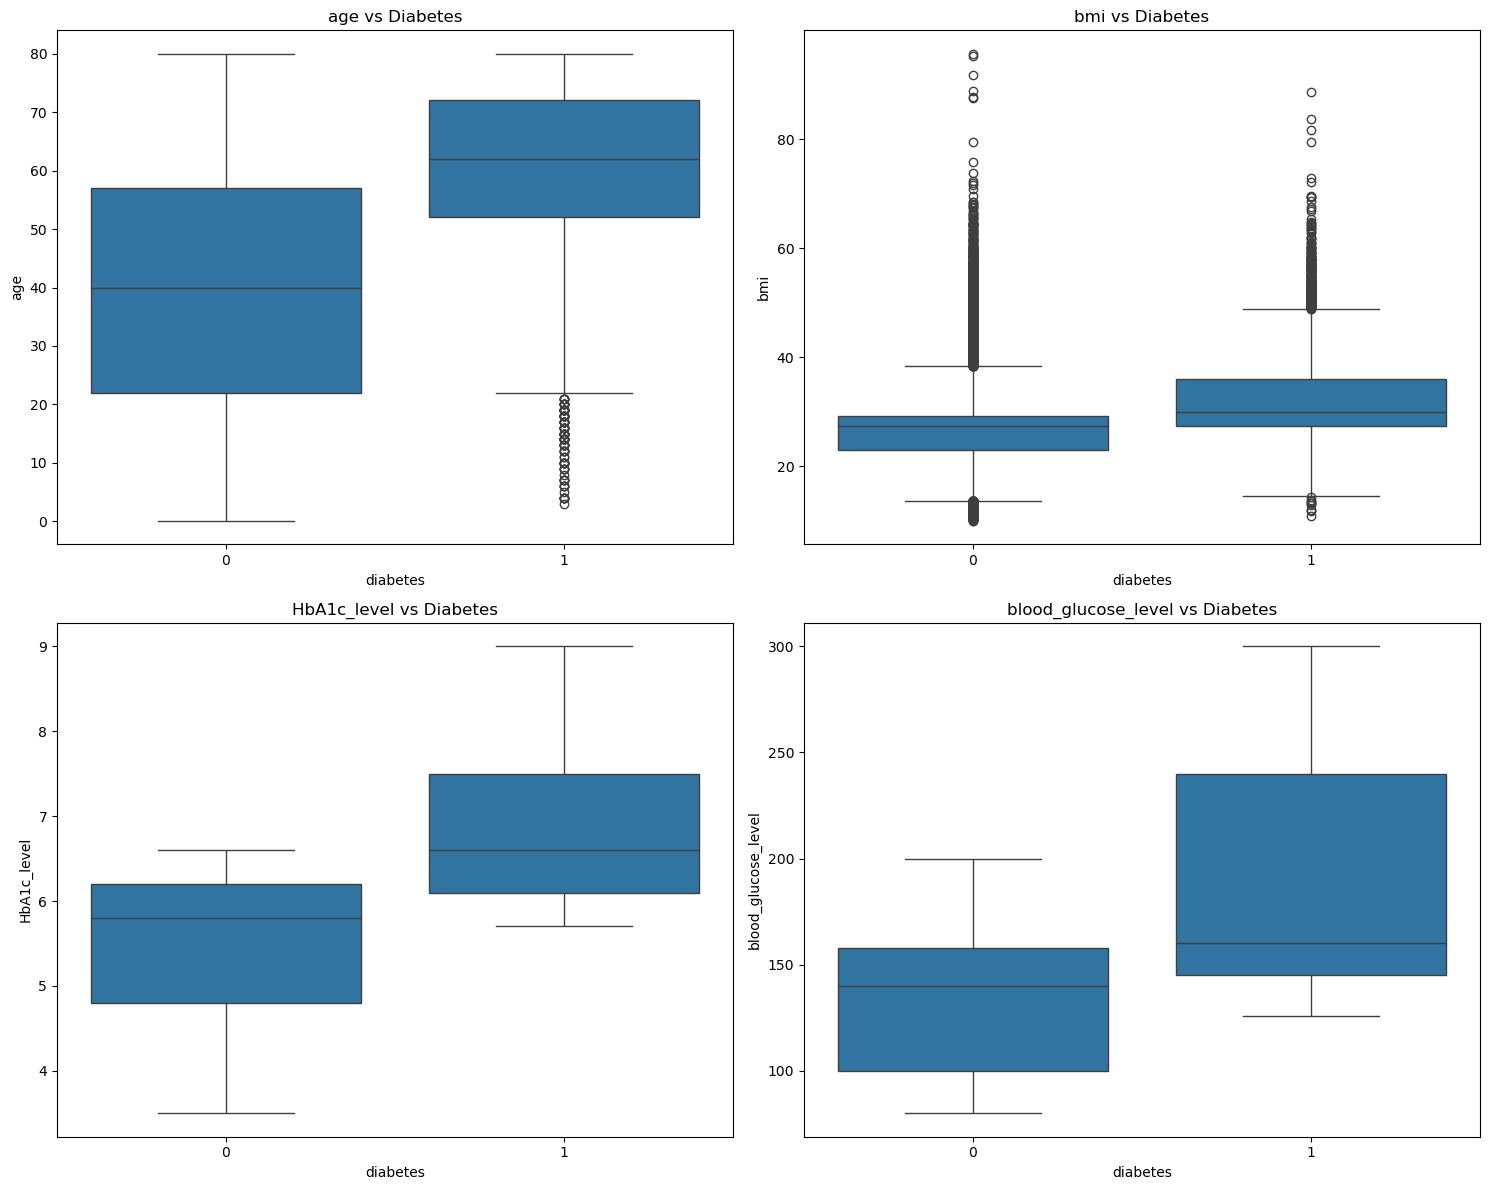

In [14]:
numeric_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for i, var in enumerate(numeric_vars):
    row, col = i // 2, i % 2
    sns.boxplot(x='diabetes', y=var, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Diabetes')
plt.tight_layout()
plt.show()

`Age` vs `Diabetes`:
Nhóm mắc tiểu đường có độ tuổi cao hơn rõ rệt.
*→ Tuổi càng lớn, nguy cơ mắc tiểu đường càng tăng.*

`BMI` vs `Diabetes`:
Nhóm mắc tiểu đường có BMI cao hơn và xuất hiện nhiều giá trị cực trị hơn.
*→ Thừa cân/béo phì có mối liên hệ với nguy cơ tiểu đường.*

`HbA1c` vs `Diabetes`:
Nhóm mắc tiểu đường có mức HbA1c cao hơn đáng kể.
*→ HbA1c là chỉ số quan trọng phân biệt bệnh nhân tiểu đường.*

`Glucose` vs `Diabetes`:
Nhóm mắc tiểu đường có mức glucose máu cao vượt trội.
*→ Glucose là yếu tố chẩn đoán mạnh mẽ nhất trong dataset.*

**Biểu đồ histogram các biến định tính theo biến mục tiêu**

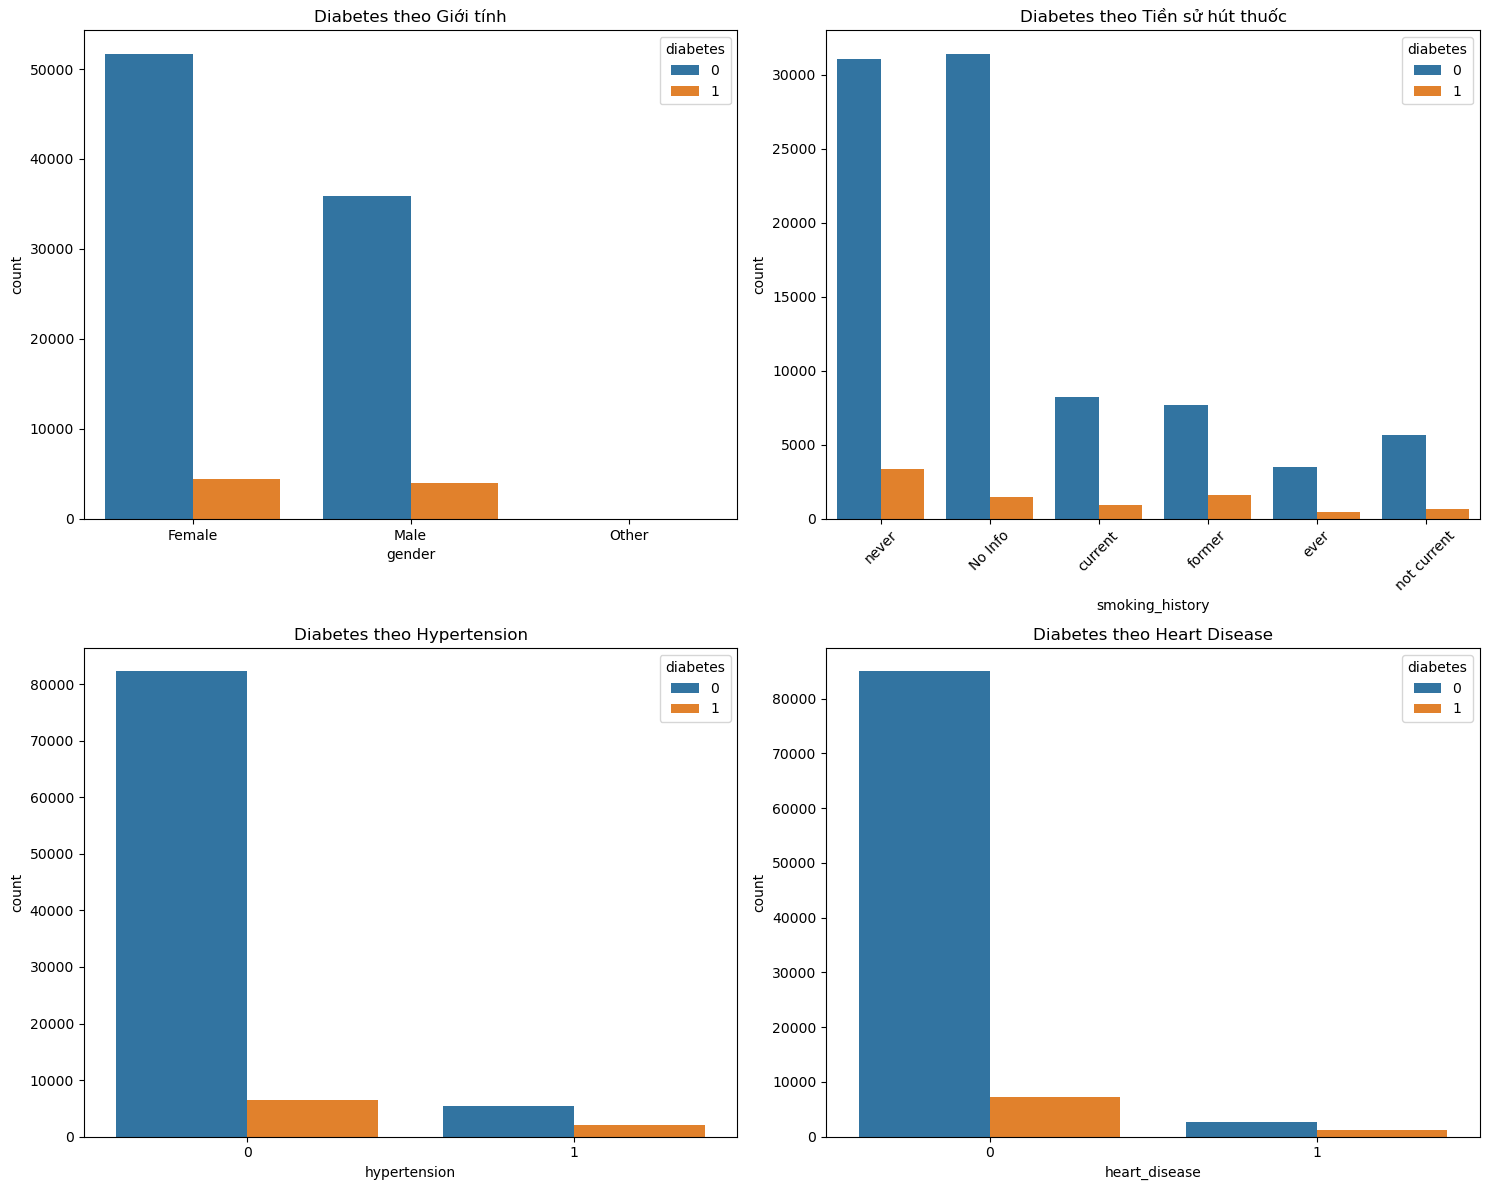

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gender vs Diabetes
sns.countplot(x='gender', hue='diabetes', data=data, ax=axes[0,0])
axes[0,0].set_title('Diabetes theo Giới tính')

# Smoking vs Diabetes
sns.countplot(x='smoking_history', hue='diabetes', data=data, ax=axes[0,1])
axes[0,1].set_title('Diabetes theo Tiền sử hút thuốc')
axes[0,1].tick_params(axis='x', rotation=45)

# Hypertension vs Diabetes
sns.countplot(x='hypertension', hue='diabetes', data=data, ax=axes[1,0])
axes[1,0].set_title('Diabetes theo Hypertension')

# Heart Disease vs Diabetes
sns.countplot(x='heart_disease', hue='diabetes', data=data, ax=axes[1,1])
axes[1,1].set_title('Diabetes theo Heart Disease')

plt.tight_layout()
plt.show()

`Gender` vs `Diabetes`: Số ca tiểu đường ở nữ và nam tương đối tương đương tỷ lệ phân bố dân số.
Nhóm "Other" rất nhỏ, không có ý nghĩa thống kê.
*→ Gender không phải yếu tố phân biệt rõ rệt trong dữ liệu này.*

`Smoking history` vs `Diabetes`
Nhóm never và no info chiếm đa số cả 2 nhóm diabetes & không diabetes. Người hút hiện tại (current) và từng hút (former) có tỷ lệ tiểu đường nhỉnh hơn một chút, nhưng không quá khác biệt.
*→ Hút thuốc có xu hướng liên quan nhưng không mạnh, dữ liệu còn thiếu thông tin ("No info" lớn).*

`Hypertension` vs `Diabetes`:
Người bị cao huyết áp có tỷ lệ mắc tiểu đường cao hơn rõ rệt so với người không bị.
*→ Tăng huyết áp là yếu tố liên quan mạnh đến nguy cơ tiểu đường.*

`Heart Disease` vs `Diabetes`:
Người mắc bệnh tim có tỷ lệ tiểu đường cao hơn nhóm không bệnh tim.
*→ Bệnh tim mạch liên quan đáng kể đến tiểu đường.*

> Tăng huyết áp và bệnh tim có mối liên hệ rõ ràng với tiểu đường, trong khi giới tính và hút thuốc thể hiện xu hướng nhưng mức độ không mạnh bằng.

### Phân tích đa biến

**Độ tương quan giữa các biến**

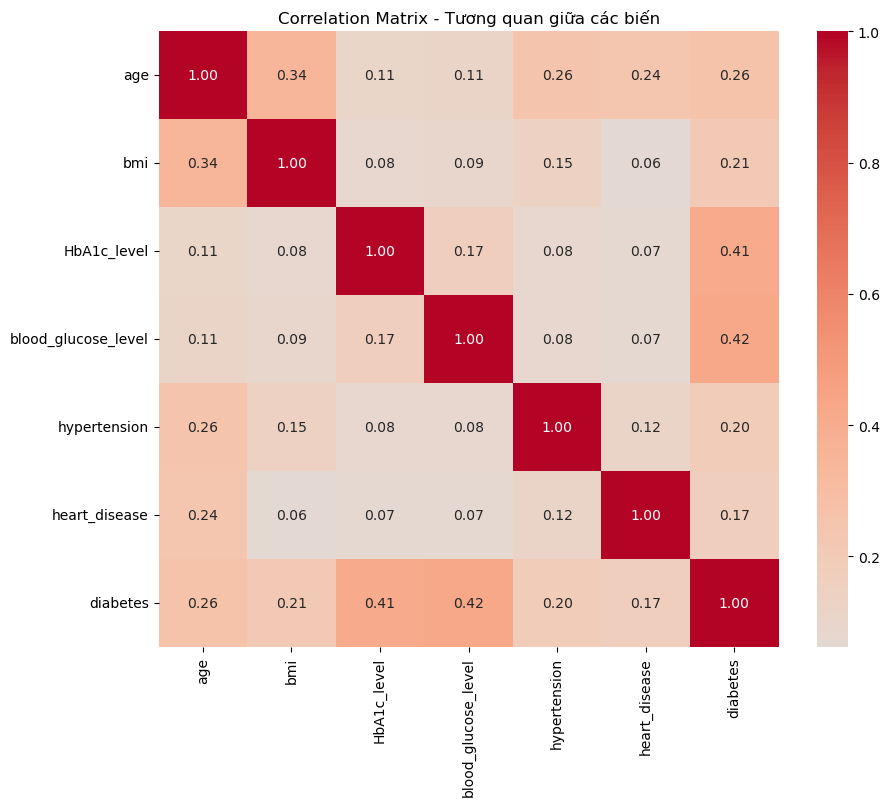

In [16]:
plt.figure(figsize=(10, 8))
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 
                'hypertension', 'heart_disease', 'diabetes']
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Tương quan giữa các biến')
plt.show()

- `HbA1c_level` và `blood_glucose_level` có tương quan cao nhất với `diabetes` (≈0.41–0.42) → Đây là hai yếu tố quan trọng nhất để dự đoán bệnh tiểu đường.

- `Age`, `BMI`, `Hypertension`, `Heart disease` có tương quan mức trung bình thấp (0.17–0.26) → có liên quan nhưng ảnh hưởng yếu hơn.

- Giữa các biến độc lập, hầu hết có tương quan thấp (<0.35) → ít đa cộng tuyến, phù hợp cho mô hình hồi quy hoặc phân loại.

- `Age` ↔ `BMI` có tương quan nhẹ (0.34) – phản ánh xu hướng tuổi càng cao, BMI có thể tăng.

> `HbA1c` và `Glucose` là hai đặc trưng quan trọng nhất liên quan đến `diabetes`; các biến còn lại chỉ đóng vai trò hỗ trợ.

## Xử lý dữ liệu

Sau quá trình trực quan dữ liệu, 4 biến `Age`, `BMI`, `HbA1c` và `Glucose` được lựa chọn để xem xét và xử lý ngoại lệ do đây là các biến định lượng quan trọng phản ánh đặc điểm sức khoẻ của bệnh nhân và có ảnh hưởng trực tiếp đến khả năng dự đoán nguy cơ tiểu đường. Việc xử lý các giá trị bất thường ở những biến này giúp giảm nhiễu, đảm bảo tính toàn vẹn dữ liệu và cải thiện hiệu quả mô hình dự đoán.

In [17]:
# Tạo bản sao để xử lý
data_clean = data.copy()
print("Kích thước ban đầu:", data_clean.shape)

Kích thước ban đầu: (96146, 9)


`Age`

Kiểm tra tần suất xuất hiện của các giá trị trong biến Age

In [18]:
age_counts = data['age'].value_counts().sort_index()
print(age_counts.tail())


age
76.0     724
77.0     719
78.0     670
79.0     607
80.0    4932
Name: count, dtype: int64


In [19]:
# AGE - Xử lý tuổi 80
age_q99 = data_clean['age'].quantile(0.99)
data_clean = data_clean[data_clean['age'] <= age_q99]
print(f" Đã xóa age > {age_q99:.0f} (tuổi cực cao)")

 Đã xóa age > 80 (tuổi cực cao)


`BMI`

Cắt ngưỡng BMI trên mức 99.5% để giảm ảnh hưởng của các giá trị BMI quá cao (>60) nhưng vẫn giữ được tính thực tế của dữ liệu, vì BMI lớn vẫn có thể xuất hiện ở người béo phì bệnh lý.

Áp dụng phương pháp *Winsorization* bằng cách cắt (cap) các giá trị vượt quá ngưỡng 99.5% (quantile 0.995).

In [20]:
# BMI - Xử lý triệt để outliers (>60)
bmi_q99 = data_clean['bmi'].quantile(0.995)  # Dùng 99.5% để giữ tính thực tế
data_clean.loc[:, 'bmi'] = np.where(data_clean['bmi'] > bmi_q99, bmi_q99, data_clean['bmi'])
print(f" Đã cap BMI > {bmi_q99:.1f}")


 Đã cap BMI > 52.7


`HbA1c` & `Glucose`

- `HbA1c` được giữ nguyên vì giá trị cao thể hiện mức độ kiểm soát đường huyết kém của bệnh nhân. Đây là chỉ số chẩn đoán quan trọng trong y khoa và các giá trị cao không phải lỗi nhập liệu mà phản ánh mức độ nặng nhẹ của bệnh tiểu đường.

- Các giá trị `Glucose` cao cũng mang ý nghĩa lâm sàng, cho thấy bệnh nhân có tình trạng tăng đường huyết. Đây là đặc trưng quyết định của bệnh tiểu đường.

Hai biến này chứa các giá trị lớn ở đây mang ý nghĩa lâm sàng thực tế, phản ánh tình trạng bệnh nhân có mức đường huyết cao hoặc kiểm soát đường kém, vì thế không cap hoặc loại bỏ hai biến này.

In [21]:
print("Kích thước sau xử lý:", data_clean.shape)
print(f"Tỷ lệ diabetes sau xử lý: {data_clean['diabetes'].mean():.3f}")

Kích thước sau xử lý: (96146, 9)
Tỷ lệ diabetes sau xử lý: 0.088


## Xây dựng mô hình

#### Chia dữ liệu Train-Test

Chia bộ dữ liệu ra làm dữ liệu Train và dữ liệu Test, với:

- X: Features (các đặc điểm đầu vào) - tất cả cột trừ 'diabetes'

- y: Target (biến mục tiêu) - cột 'diabetes'

- test_size=0.2: Chia 80% train - 20% test

- random_state=42: Đảm bảo kết quả chia giống nhau mỗi lần chạy

- stratify=y: Giữ nguyên tỷ lệ diabetes trong cả train và test (quan trọng với data imbalance)

Kết quả:

- X_train, y_train: Dữ liệu huấn luyện (80%)

- X_test, y_test: Dữ liệu kiểm tra (20%)

In [22]:
from sklearn.model_selection import train_test_split

X = data_clean.drop('diabetes', axis=1)
y = data_clean['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Chuẩn hóa dữ liệu

Đưa các features về cùng thang đo  để cải thiện hiệu suất mô hình. 
Giúp mô hình hội tụ nhanh hơn và không bị chi phối bởi biến có giá trị lớn

- StandardScaler(): Chuẩn hóa về phân phối chuẩn (mean=0, std=1)

$$
x' = \frac{x - \mu}{\sigma}
$$
- cols_to_scale: Các biến số cần chuẩn hóa (tuổi, BMI, HbA1c, glucose)

- fit_transform(X_train): Tính mean/std từ train data và áp dụng chuẩn hóa

- transform(X_test): Áp dụng cùng mean/std từ train để chuẩn hóa test data

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


Các biến dạng Text (*gender, smoking_history*) được mã hoá bằng *One-Hot Encoding* để chuyển thành dữ liệu số cho mô hình SVM. drop_first được dùng để tránh đa cộng tuyến và reindex giúp đảm bảo tập train và test có cùng cấu trúc đặc trưng sau mã hoá.

`smoking_history`

- Nếu người đó "current" → cột smoking_history_current = True

- Nếu người đó "not_current" → cột smoking_history_not_current = True

- Nếu "former" → smoking_history_former = True

- Nếu "never" → tất cả cột = False (baseline)

`gender`

- Nếu giới tính người đó là "Male" → cột gender_Male = True

- Nếu giới tính người đó là "Other" → cột gender_Other = True

In [24]:
# Copy để đảm bảo không sửa gốc
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Các cột phân loại
cat_cols = ['gender','smoking_history']

# One-hot encode
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols, drop_first=True)
X_test_enc = pd.get_dummies(X_test_enc, columns=cat_cols, drop_first=True)

# Đảm bảo test có cùng cột với train
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

X_train_enc.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
79000,0.144164,0,0,-0.515259,0.158030,-0.296217,True,False,False,False,False,False,False
32011,0.989825,0,0,0.865957,-1.427179,-0.296217,False,False,False,False,True,False,False
95559,0.144164,0,0,0.004959,0.997258,-0.296217,False,False,False,False,False,False,False
32057,0.099655,1,0,0.237172,-0.681198,-1.421004,True,False,False,False,False,False,False
97797,-0.656989,0,0,-0.121703,0.904010,1.513222,False,False,False,False,False,False,True


Tạo mô hình

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# y phải là 1D
y_train_vec = y_train.values.ravel()

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale',
                probability=False, class_weight='balanced',
                cache_size=500, random_state=42)

Huân luyện mô hình

In [26]:
svm_model.fit(X_train_enc, y_train_vec)

SVC(cache_size=500, class_weight='balanced', random_state=42)

Dự đoán nhãn và đánh giá mô hình

In [29]:
y_pred = svm_model.predict(X_test_enc)
print(y_pred)


[1 0 0 ... 0 0 0]


In [30]:
# dùng decision_function làm thang điểm liên tục cho AUC
y_score = svm_model.decision_function(X_test_enc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_score))

[[15408  2126]
 [  144  1552]]
              precision    recall  f1-score   support

           0      0.991     0.879     0.931     17534
           1      0.422     0.915     0.578      1696

    accuracy                          0.882     19230
   macro avg      0.706     0.897     0.754     19230
weighted avg      0.941     0.882     0.900     19230

ROC-AUC: 0.9676294681384523


Mô hình SVM đạt độ chính xác 88.2% và ROC-AUC 0.97, cho thấy khả năng phân biệt rất tốt giữa người mắc và không mắc tiểu đường. 

Recall đạt 91.5%, nghĩa là mô hình phát hiện phần lớn bệnh nhân tiểu đường. Tuy nhiên, Precision 42.2% cho thấy vẫn còn nhiều trường hợp dự đoán nhầm là mắc bệnh. 

Điều này phù hợp với chiến lược ưu tiên giảm bỏ sót bệnh nhân hơn là giảm báo động giả.